In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

In [59]:
data = pd.read_csv('tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [61]:
data["sex"] = data["sex"].map({"Female" : 0, "Male" : 1})
data["smoker"] = data["smoker"].map({"Yes" : 1, "No" : 0})
data["day"] = data["day"].map({"Thur" : 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch" : 0, "Dinner" : 1})

In [63]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [65]:
X = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(data["tip"])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=69)

In [67]:
model1 = LinearRegression()
model1.fit(Xtrain , ytrain)
ypred=model1.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.5356014100712907


In [69]:
model2 = Ridge()
model2.fit(Xtrain , ytrain)
ypred=model2.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.5356885090526605


In [71]:
model3 = Lasso()
# ("Decision Tree", DecisionTreeRegressor()),  ("Random Forest", RandomForestRegressor()),("svr",SVR()) ,("KNN",KNeighborsRegressor())]
model3.fit(Xtrain , ytrain)
ypred=model3.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.521619979353606


In [73]:
model4 = DecisionTreeRegressor()
model4.fit(Xtrain , ytrain)
ypred=model4.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.3629612277386872


In [75]:
model5 = RandomForestRegressor()
#),("svr",SVR()) ,("KNN",KNeighborsRegressor())]
model5.fit(Xtrain , ytrain)
ypred=model5.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.5662730485951648


In [77]:
model6 = SVR()
# ) ,("KNN",KNeighborsRegressor())]
model6.fit(Xtrain , ytrain)
ypred=model6.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.43780931930043643


In [79]:
model7 = KNeighborsRegressor()
model7.fit(Xtrain , ytrain)
ypred=model7.predict(Xtest)
r2=r2_score(ytest, ypred)
print(r2)

0.38207264926524065


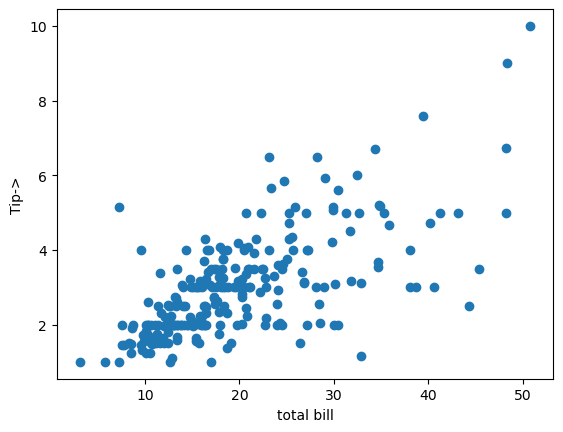

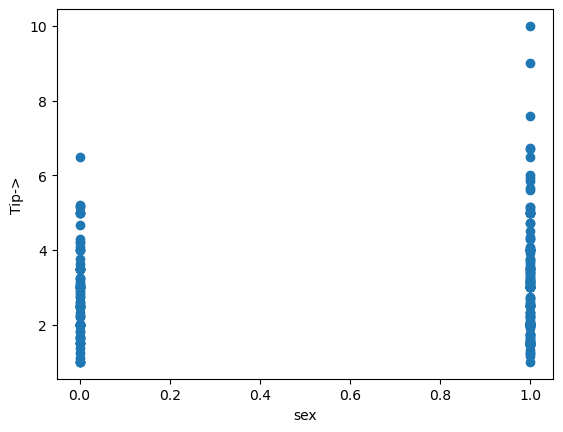

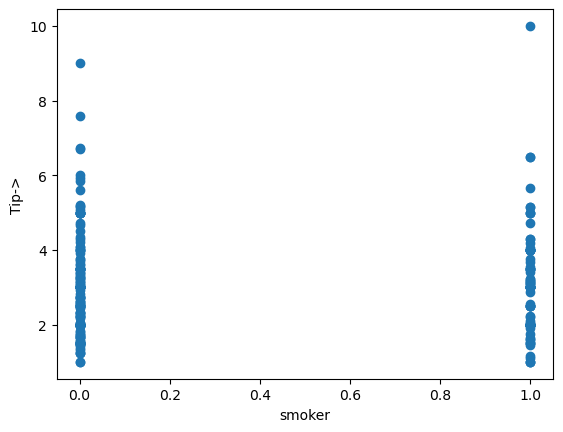

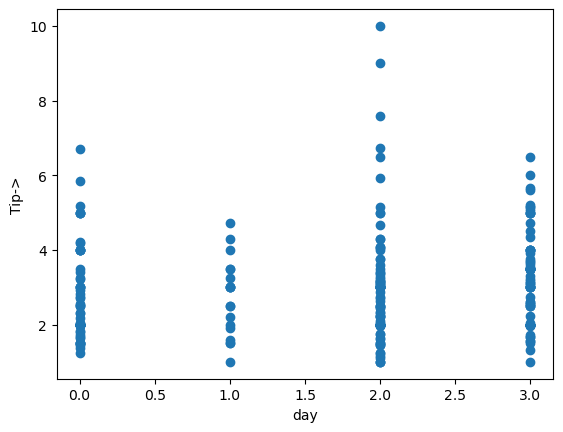

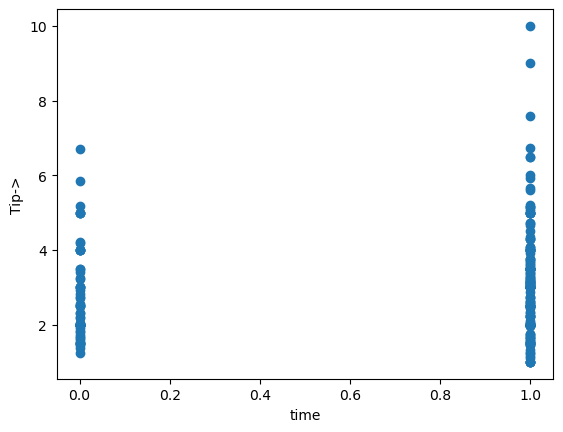

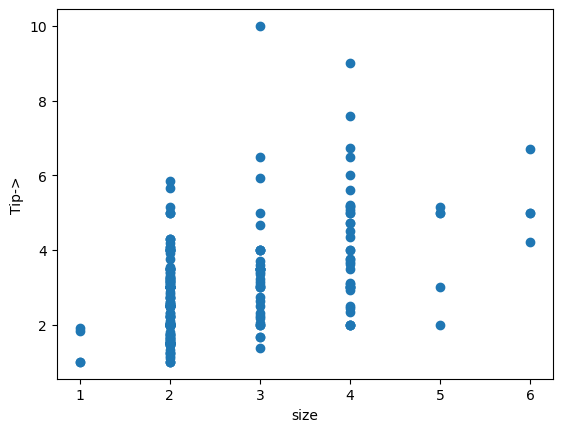

In [85]:
feature = [("total bill",data['total_bill']),("sex", data['sex']),("smoker", data['smoker']),("day", data['day']),
              ("time", data['time']),("size", data['size'])]
for a,b in feature:
    plt.scatter(b, data['tip'])
    plt.xlabel(a)
    plt.ylabel('Tip->')
    plt.show()

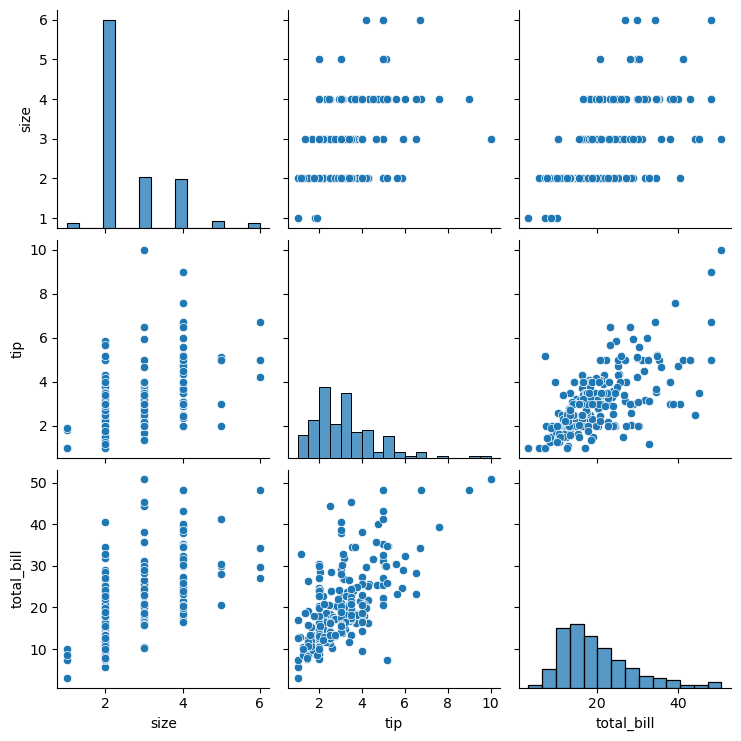

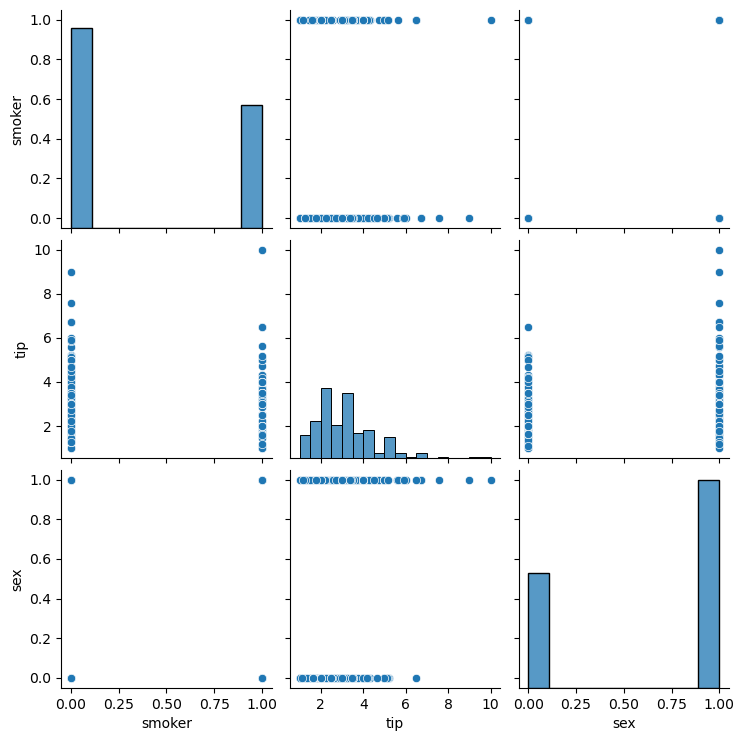

In [87]:
sns.pairplot(data[['size', 'tip', 'total_bill']])
plt.show()
sns.pairplot(data[['smoker', 'tip', 'sex']])
plt.show()

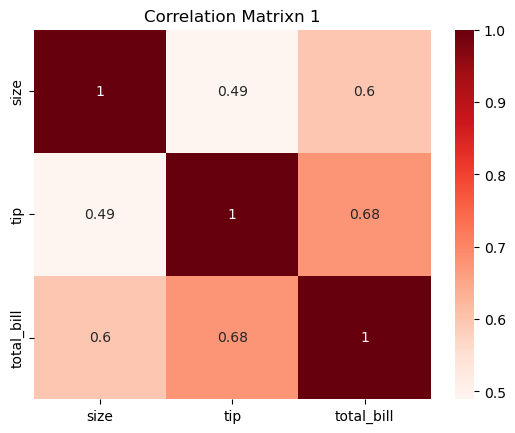

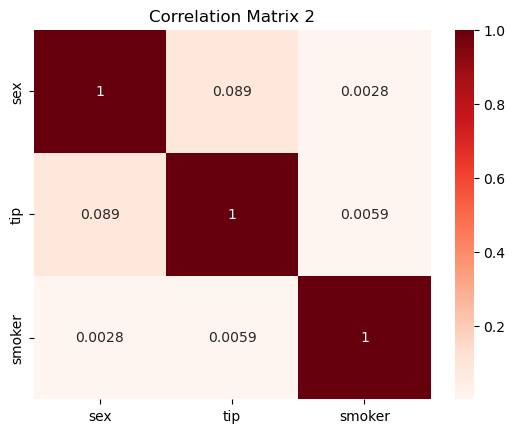

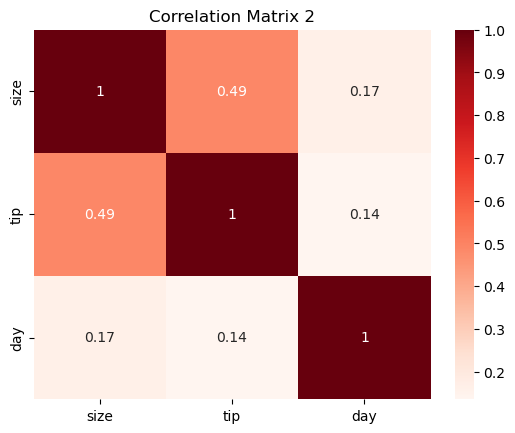

In [97]:
corr_matrix = data[['size', 'tip', 'total_bill']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrixn 1')
plt.show()
corr_matrix = data[['sex', 'tip', 'smoker']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix 2')
plt.show()
corr_matrix = data[['size', 'tip', 'day']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix 2')
plt.show()

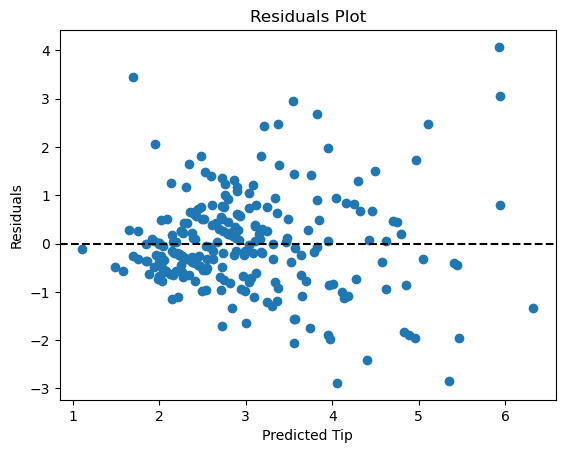

In [103]:
s1= Ridge()
s1.fit(X,y)
predicted = s1.predict(X)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [109]:
features = [data['total_bill'], data['sex'],data['smoker'],data['day'], data['time'],data['size']]
for p in features:
    x = sm.add_constant(data['total_bill'])
    Y = p
    model = sm.OLS(Y, x).fit()
    rainbow_stats, rainbow_p_value = linear_rainbow(model)
    print(f'rainbow test statistic ": {rainbow_stats}, p-value: {rainbow_p_value}')
    

rainbow test statistic ": 2.413767715036403, p-value: 9.897194511394457e-07
rainbow test statistic ": 0.9596359860385912, p-value: 0.5896472891352866
rainbow test statistic ": 1.0967661477556323, p-value: 0.30632609082077683
rainbow test statistic ": 0.7217406121305135, p-value: 0.9630389085869561
rainbow test statistic ": 0.6858476996611753, p-value: 0.9805475303218094
rainbow test statistic ": 0.7869159695051342, p-value: 0.9056759819539304


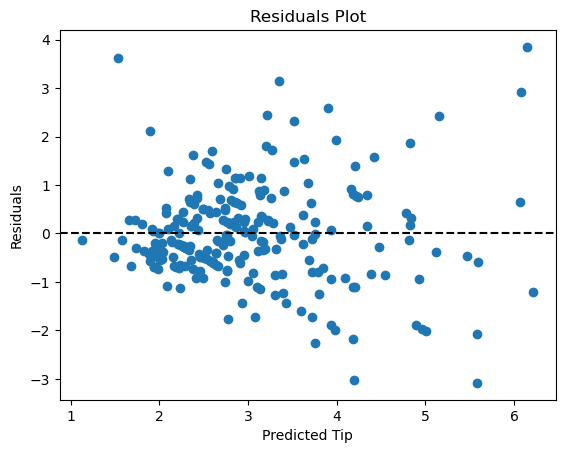

In [113]:
sol = LinearRegression()
sol.fit(Xtrain,ytrain)
predicted = sol.predict(X)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()